
<div style="border-radius:10px;
            border : #015a2c solid;
            background-color:#D7D9DB;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">
​
<center><h1 style="padding: 25px 0px; color:#015a4c; font-weight: bold; font-family: Cursive">
Amit Project for Data Science Module <br><br>💡💡💡💡💡 <br><br> AI Online 74  </h1></center>
<center><h3 style="padding-bottom: 25px; color:#025b2c; font-weight: bold; font-style:italic; font-family: Cursive">
Using Project: Trip data Ford go bike  </h3></center>     
​
</div>

# Part I - (Dataset Exploration for Ford GoBike)

### worked by (Your Name/2024 )

## Introduction

.

> **Let's introduce our dataset:**


======================================

.

**This data set information was produced from `Ford GoBike` System** the information in it talked about individual rides that were made in a bike-sharing system for covering San Francisco Bay area.** 

.




> ## And here are the main exploring questions 



   **==================================================**



- What is the structure of your dataset?


- What are the main interesting features in the dataset?


- What features in the dataset supported my investigation for these interesting features?




.

> ### Also here are the investigative questions classified into three types



   **================================================**
   
   


###  <a href='#011'> Univariate Exploration</a> 

- <a href='#1'> 1 ) . What is the distribution of `User type`?</a>  
- <a href='#2'> 2 ) . What is the distribution for the `bike share users on all Trips`?</a>  
- <a href='#3'> 3 ) . What is the distribution for users' `ages`?</a>  
- <a href='#4'> 4 ) . Do the users' ages have `outlier` values?</a>
- <a href='#5'> 5 ) . What is the distribution for the trip duration in `minutes`? </a>
- <a href='#6'> 6) . What is the distribution for `member_gender`? </a>
- <a href='#7'> 7) . What is the distribution for the trip duration in `Hours`?  </a>




##  <a href='#111'> Bivariate Exploration</a> 


- <a href='#8'> 8 ) . What the `average duration` of trip for the categories of `user type`? </a>
- <a href='#9'> 9 ) . How long is the duration of the trip for `each gender` in `minutes`? </a>
- <a href='#10'> 10 ) . How long is the duration of the trip for each `user_type` in `minutes`?  </a>
- <a href='#11'> 11 ) . How the user distribution depending on their `Age` and `user_type` ?</a>
- <a href='#12'>12 ). How the user distribution depending on their `Age` and `member_gender` ?  </a>


##  <a href='#1111'> Multivariate Exploration</a> 


- <a href='#13'> 13 ) . What is the Correlation between `each` variable in the dataset?</a>  
- <a href='#14'> 14 ) . What is the Correlation between `specific numeric variables` in the dataset?</a>  
- <a href='#15'> 15 ) . What is the  Correlation between `data_stat` variables in the dataset?</a>  


##  <a href='#1100'> Conclusions </a> 





# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [272]:
# Load my dataset using pandas Dataframe
df= pd.read_csv('fordgobike.csv')
df.head(10)
df.columns.sort_values(ascending=True)

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [273]:
# here we make overview in high-level for data shape and composition
df.shape, df.dtypes

((183416, 16),
 duration_sec                 int64
 start_time                  object
 end_time                    object
 start_station_id           float64
 start_station_name          object
 start_station_latitude     float64
 start_station_longitude    float64
 end_station_id             float64
 end_station_name            object
 end_station_latitude       float64
 end_station_longitude      float64
 bike_id                      int64
 user_type                   object
 member_birth_year          float64
 member_gender               object
 bike_share_for_all_trip     object
 dtype: object)

In [274]:
## check each var  datatype 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  object 
 2   end_time                 183416 non-null  object 
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  object 
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  object 
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  object 
 13  member_birth_year        175151 non-null  float64
 14  memb

In [275]:
## I display 15 rows to understand the content values more 
df.head(15)

duration_sec start_time end_time  start_station_id  \
0          52185    32:10.1  01:56.0             21.00   
1          42521    53:21.8  42:03.1             23.00   
2          61854    13:13.2  24:08.1             86.00   
3          36490    54:26.0  02:36.8            375.00   
4           1585    54:18.5  20:44.1              7.00   
5           1793    49:58.6  19:51.8             93.00   
6           1147    55:35.1  14:42.6            300.00   
7           1615    41:06.8  08:02.8             10.00   
8           1570    41:48.8  07:59.7             10.00   
9           1049    49:47.7  07:17.0             19.00   
10           458    57:57.2  05:35.4            370.00   
11           506    56:55.5  05:21.7             44.00   
12          1176    45:12.7  04:49.2            127.00   
13           915    49:06.1  04:21.9            252.00   
14           395    56:26.8  03:01.9            243.00   

                                   start_station_name  start_station_latitude  \
0    Montgomery St BART Station (Market St at 2nd St)                   37.79   
1                       The Embarcadero at Steuart St                   37.79   
2                             Market St at Dolores St                   37.77   
3                             Grove St at Masonic Ave                   37.77   
4                                 Frank H Ogawa Plaza                   37.80   
5                        4th St at Mission Bay Blvd S                   37.77   
6                                Palm St at Willow St                   37.32   
7                          Washington St at Kearny St                   37.80   
8                          Washington St at Kearny St                   37.80   
9                                Post St at Kearny St                   37.79   
10                                Jones St at Post St                   37.79   
11  Civic Center/UN Plaza BART Station (Market St ...                   37.78   
12                             Valencia St at 21st St                   37.76   
13                       Channing Way at Shattuck Ave                   37.87   
14                        Bancroft Way at College Ave                   37.87   

    start_station_longitude  end_station_id  \
0                   -122.40           13.00   
1                   -122.39           81.00   
2                   -122.43            3.00   
3                   -122.45           70.00   
4                   -122.27          222.00   
5                   -122.39          323.00   
6                   -121.88          312.00   
7                   -122.40          127.00   
8                   -122.40          127.00   
9                   -122.40          121.00   
10                  -122.41           43.00   
11                  -122.41          343.00   
12                  -122.42          323.00   
13                  -122.27          244.00   
14                  -122.25          252.00   

                                     end_station_name  end_station_latitude  \
0                      Commercial St at Montgomery St                 37.79   
1                                  Berry St at 4th St                 37.78   
2        Powell St BART Station (Market St at 4th St)                 37.79   
3                              Central Ave at Fell St                 37.77   
4                               10th Ave at E 15th St                 37.79   
5                                  Broadway at Kearny                 37.80   
6                            San Jose Diridon Station                 37.33   
7                              Valencia St at 21st St                 37.76   
8                              Valencia St at 21st St                 37.76   
9                                  Mission Playground                 37.76   
10  San Francisco Public Library (Grove St at Hyde...                 37.78   
11                                Bryant St at 2nd St                 37.78  

In [276]:
# descriptive statistics for numeric variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count    183,416.00        183,219.00              183,416.00   
mean         726.07            138.59                   37.77   
std        1,794.37            111.78                    0.10   
min           61.00              3.00                   37.32   
25%          325.00             47.00                   37.77   
50%          514.00            104.00                   37.78   
75%          796.00            239.00                   37.80   
max       85,444.00            398.00                   37.88   

       start_station_longitude  end_station_id  end_station_latitude  \
count               183,416.00      183,219.00            183,416.00   
mean                   -122.35          136.25                 37.77   
std                       0.12          111.51                  0.10   
min                    -122.45            3.00                 37.32   
25%                    -122.41           44.00                 37.77   
50%                    -122.40          100.00                 37.78   
75%                    -122.29          235.00                 37.80   
max                    -121.87          398.00                 37.88   

       end_station_longitude    bike_id  member_birth_year  
count             183,416.00 183,416.00         175,151.00  
mean                 -122.35   4,472.89           1,984.81  
std                     0.12   1,664.39              10.12  
min                  -122.45      11.00           1,878.00  
25%                  -122.41   3,777.00           1,980.00  
50%                  -122.40   4,958.00           1,987.00  
75%                  -122.29   5,502.00           1,992.00  
max                  -121.87   6,645.00           2,001.00

In [277]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Uniqe": n_uniq}).T

duration_sec start_time end_time start_station_id  \
Dtypes           int64     object   object          float64   
Num_Uniqe         4752      35783    35767              329   

          start_station_name start_station_latitude start_station_longitude  \
Dtypes                object                float64                 float64   
Num_Uniqe                329                    334                     335   

          end_station_id end_station_name end_station_latitude  \
Dtypes           float64           object              float64   
Num_Uniqe            329              329                  335   

          end_station_longitude bike_id user_type member_birth_year  \
Dtypes                  float64   int64    object           float64   
Num_Uniqe                   335    4646         2                75   

          member_gender bike_share_for_all_trip  
Dtypes           object                  object  
Num_Uniqe             3                       2

In [278]:
cols = ["bike_share_for_all_trip", "member_gender", "user_type"]
df[cols] = df[cols].astype('category')
# df["member_birth_year"].astype("int64")
pd.DataFrame(df.dtypes).T

duration_sec start_time end_time start_station_id start_station_name  \
0        int64     object   object          float64             object   

  start_station_latitude start_station_longitude end_station_id  \
0                float64                 float64        float64   

  end_station_name end_station_latitude end_station_longitude bike_id  \
0           object              float64               float64   int64   

  user_type member_birth_year member_gender bike_share_for_all_trip  
0  category           float64      category                category

In [279]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

duration_sec  start_time  end_time  start_station_id  \
Null_sum          0.00        0.00      0.00            197.00   
Ratio             0.00        0.00      0.00              0.00   

          start_station_name  start_station_latitude  start_station_longitude  \
Null_sum              197.00                    0.00                     0.00   
Ratio                   0.00                    0.00                     0.00   

          end_station_id  end_station_name  end_station_latitude  \
Null_sum          197.00            197.00                  0.00   
Ratio               0.00              0.00                  0.00   

          end_station_longitude  bike_id  user_type  member_birth_year  \
Null_sum                   0.00     0.00       0.00           8,265.00   
Ratio                      0.00     0.00       0.00               0.05   

          member_gender  bike_share_for_all_trip  
Null_sum       8,265.00                     0.00  
Ratio              0.05                     0.00

In [280]:
numuric_col = ["duration_sec","start_station_id","start_station_latitude","start_station_longitude","end_station_id","end_station_latitude","end_station_longitude","bike_id","member_birth_year",]
cat_col = [] #List to convert to categorical datatype
for list in df.columns:
    if(list not in numuric_col):
        cat_col.append(list)
print(cat_col)

['start_time', 'end_time', 'start_station_name', 'end_station_name', 'user_type', 'member_gender', 'bike_share_for_all_trip']


In [281]:
df[cat_col] = df[cat_col].astype("category")
dataTypes = df.dtypes
numberDataTypes = df.nunique().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Number DataTypes":numberDataTypes}).T
dataframe

duration_sec start_time  end_time start_station_id  \
DataType                int64   category  category          float64   
Number DataTypes        83685      83685     83685            83685   

                 start_station_name start_station_latitude  \
DataType                   category                float64   
Number DataTypes              83685                  83685   

                 start_station_longitude end_station_id end_station_name  \
DataType                         float64        float64         category   
Number DataTypes                   83685          83685            83685   

                 end_station_latitude end_station_longitude bike_id user_type  \
DataType                      float64               float64   int64  category   
Number DataTypes                83685                 83685   83685     83685   

                 member_birth_year member_gender bike_share_for_all_trip  
DataType                   float64      category                category  
Number DataTypes             83685         83685                   83685

In [282]:
dublicateditems = df[numuric_col].duplicated()
dublicateditems

0         False
1         False
2         False
3         False
4         False
          ...  
183411    False
183412     True
183413     True
183414     True
183415     True
Length: 183416, dtype: bool



> ### What is the structure of your dataset?





- The structure of the dataset contains  16 columns and 183415 rows.
 
 
- Most variables are Numeric in nature , and here are **dtypes summary :**

        - category(7)
        - float64(7)
        - int64(2)
        



> ### What are the main interesting features in the dataset?

        -duration


 **We got three main feature areas which are :**
 
 
 
 
- duration
 
 
 
- member_birth_year
 
  
 
  
- member_gender




> ### What features in the dataset supported my investigation for these interesting features?



- member_gender	



- member_birth_year



- start_station





- end_station





##  More Exploring ideas to begin my investigation

In [283]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "N_Unique": n_unique}).T

duration_sec start_time  end_time start_station_id  \
Dtypes          int64   category  category          float64   
N_Unique         4752      35783     35767              329   

         start_station_name start_station_latitude start_station_longitude  \
Dtypes             category                float64                 float64   
N_Unique                329                    334                     335   

         end_station_id end_station_name end_station_latitude  \
Dtypes          float64         category              float64   
N_Unique            329              329                  335   

         end_station_longitude bike_id user_type member_birth_year  \
Dtypes                 float64   int64  category           float64   
N_Unique                   335    4646         2                75   

         member_gender bike_share_for_all_trip  
Dtypes        category                category  
N_Unique             3                       2

In [284]:
df.describe().T

count     mean      std      min      25%  \
duration_sec            183,416.00   726.07 1,794.37    61.00   325.00   
start_station_id        183,219.00   138.59   111.78     3.00    47.00   
start_station_latitude  183,416.00    37.77     0.10    37.32    37.77   
start_station_longitude 183,416.00  -122.35     0.12  -122.45  -122.41   
end_station_id          183,219.00   136.25   111.51     3.00    44.00   
end_station_latitude    183,416.00    37.77     0.10    37.32    37.77   
end_station_longitude   183,416.00  -122.35     0.12  -122.45  -122.41   
bike_id                 183,416.00 4,472.89 1,664.39    11.00 3,777.00   
member_birth_year       175,151.00 1,984.81    10.12 1,878.00 1,980.00   

                             50%      75%       max  
duration_sec              514.00   796.00 85,444.00  
start_station_id          104.00   239.00    398.00  
start_station_latitude     37.78    37.80     37.88  
start_station_longitude  -122.40  -122.29   -121.87  
end_station_id            100.00   235.00    398.00  
end_station_latitude       37.78    37.80     37.88  
end_station_longitude    -122.40  -122.29   -121.87  
bike_id                 4,958.00 5,502.00  6,645.00  
member_birth_year       1,987.00 1,992.00  2,001.00

In [285]:
#This code for describing statistical data ideas in a more organized and readable table
from tabulate import tabulate
data = {
    "Statistic": ["Mean", "Median", "Standard Deviation", "Variance", "Minimum", "Maximum"],
    "Value": [25.4, 23.0, 4.5, 20.25, 18, 32],
    "Description": [
        "The average value of the dataset.",
        "The middle value when the data is sorted.",
        "A measure of data dispersion.",
        "The square of the standard deviation.",
        "The smallest value in the dataset.",
        "The largest value in the dataset.",
    ]
}
dff = pd.DataFrame(data)
print(tabulate(dff, headers='keys', tablefmt='grid'))



+----+--------------------+---------+-------------------------------------------+
|    | Statistic          |   Value | Description                               |
+====+====================+=========+===========================================+
|  0 | Mean               |   25.4  | The average value of the dataset.         |
+----+--------------------+---------+-------------------------------------------+
|  1 | Median             |   23    | The middle value when the data is sorted. |
+----+--------------------+---------+-------------------------------------------+
|  2 | Standard Deviation |    4.5  | A measure of data dispersion.             |
+----+--------------------+---------+-------------------------------------------+
|  3 | Variance           |   20.25 | The square of the standard deviation.     |
+----+--------------------+---------+-------------------------------------------+
|  4 | Minimum            |   18    | The smallest value in the dataset.        |
+----+----------

In [286]:
# display the information about each column
dataTypes = dff.dtypes
DataTypes = dff.nunique().sum()
Null = dff.isnull().sum()
Dublicated = dff.duplicated().sum()
dataframe = pd.DataFrame({"DataType":dataTypes," DataTypes":DataTypes,"Null values": Null,"Duplicated":Dublicated}).T
dataframe


Statistic    Value Description
DataType       object  float64      object
 DataTypes         18       18          18
Null values         0        0           0
Duplicated          0        0           0

In [287]:
Null = df.isnull().sum()
# Display columns with missing values
print("Columns with Missing Values:")
print(tabulate(Null.reset_index(), headers=["Column", "Missing Values"], tablefmt="grid"))

print("\nRows with Missing Values:")
rows_with_missing = df[df.isnull().any(axis=1)]
print(tabulate(rows_with_missing, headers='keys', tablefmt='grid'))

Columns with Missing Values:
+----+-------------------------+------------------+
|    | Column                  |   Missing Values |
+====+=========================+==================+
|  0 | duration_sec            |                0 |
+----+-------------------------+------------------+
|  1 | start_time              |                0 |
+----+-------------------------+------------------+
|  2 | end_time                |                0 |
+----+-------------------------+------------------+
|  3 | start_station_id        |              197 |
+----+-------------------------+------------------+
|  4 | start_station_name      |              197 |
+----+-------------------------+------------------+
|  5 | start_station_latitude  |                0 |
+----+-------------------------+------------------+
|  6 | start_station_longitude |                0 |
+----+-------------------------+------------------+
|  7 | end_station_id          |              197 |
+----+-------------------------+---


> ## <p>The result above shows many missing data </p>



###  To fix this issue You will fill these values with mode for numeric and mean for categorical

In [288]:
# trying to fill missing values in my datset using for loop 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183416 non-null  int64   
 1   start_time               183416 non-null  category
 2   end_time                 183416 non-null  category
 3   start_station_id         183416 non-null  float64 
 4   start_station_name       183416 non-null  category
 5   start_station_latitude   183416 non-null  float64 
 6   start_station_longitude  183416 non-null  float64 
 7   end_station_id           183416 non-null  float64 
 8   end_station_name         183416 non-null  category
 9   end_station_latitude     183416 non-null  float64 
 10  end_station_longitude    183416 non-null  float64 
 11  bike_id                  183416 non-null  int64   
 12  user_type                183416 non-null  category
 13  member_birth_year        183416 non-null  fl

In [289]:
df["start_station_id"] = df["start_station_id"].fillna(df["start_station_id"].mode()[0])
df["end_station_id"] = df["end_station_id"].fillna(df["end_station_id"].mode()[0])
df["member_birth_year"] = df["member_birth_year"].fillna(df["member_birth_year"].mode()[0])
df["member_gender"] = df["member_gender"].fillna(df["member_gender"].mode()[0])

In [290]:
#check the Nulls 
ratio = null / df.shape[0]
Null = df.isnull().sum()

dataframe = pd.DataFrame({"ratio":ratio,"Null values": Null})
dataframe


ratio  Null values
duration_sec              0.00            0
start_time                0.00            0
end_time                  0.00            0
start_station_id          0.00            0
start_station_name        0.00            0
start_station_latitude    0.00            0
start_station_longitude   0.00            0
end_station_id            0.00            0
end_station_name          0.00            0
end_station_latitude      0.00            0
end_station_longitude     0.00            0
bike_id                   0.00            0
user_type                 0.00            0
member_birth_year         0.05            0
member_gender             0.05            0
bike_share_for_all_trip   0.00            0

### **And with a proper category for other (member gender)**

In [291]:
##  still got a missing value in the member_gender, so let's explore this column more 

print(df.member_gender.head(15))

0       Male
1       Male
2       Male
3      Other
4       Male
5       Male
6     Female
7       Male
8      Other
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
Name: member_gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']


In [292]:
# fill  dataset with missing values.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [293]:
df['member_gender'].head(15)


0       Male
1       Male
2       Male
3      Other
4       Male
5       Male
6     Female
7       Male
8      Other
9       Male
10    Female
11      Male
12      Male
13      Male
14      Male
Name: member_gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [294]:
## check my result above 
dataTypes = df.dtypes
numberOfNull = df.isnull().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Null values": numberOfNull})
dataframe


DataType  Null values
duration_sec                int64            0
start_time               category            0
end_time                 category            0
start_station_id          float64            0
start_station_name       category            0
start_station_latitude    float64            0
start_station_longitude   float64            0
end_station_id            float64            0
end_station_name         category            0
end_station_latitude      float64            0
end_station_longitude     float64            0
bike_id                     int64            0
user_type                category            0
member_birth_year         float64            0
member_gender            category            0
bike_share_for_all_trip  category            0

> ## The result above shows that we deal with all missing data 

### Now let's check duplicate value

In [295]:
##  check duplicate in dataset
dataTypes = df.dtypes
numberOfDublicated = df.duplicated().sum()
dataframe = pd.DataFrame({"DataType":dataTypes,"Duplicated":numberOfDublicated})
dataframe

DataType  Duplicated
duration_sec                int64           4
start_time               category           4
end_time                 category           4
start_station_id          float64           4
start_station_name       category           4
start_station_latitude    float64           4
start_station_longitude   float64           4
end_station_id            float64           4
end_station_name         category           4
end_station_latitude      float64           4
end_station_longitude     float64           4
bike_id                     int64           4
user_type                category           4
member_birth_year         float64           4
member_gender            category           4
bike_share_for_all_trip  category           4

In [296]:
df['user_type'].head(20)

0       Customer
1       Customer
2       Customer
3     Subscriber
4     Subscriber
5     Subscriber
6     Subscriber
7     Subscriber
8     Subscriber
9     Subscriber
10    Subscriber
11    Subscriber
12      Customer
13    Subscriber
14    Subscriber
15    Subscriber
16    Subscriber
17    Subscriber
18    Subscriber
19      Customer
Name: user_type, dtype: category
Categories (2, object): ['Customer', 'Subscriber']

In [297]:
pd.options.display.float_format = '{:,.2f}'.format # Forammting the decimal points while displaying datadrame
df["age"] = (2024 - df['member_birth_year'])
df["age"].head(15)

0    40.00
1    39.19
2    52.00
3    35.00
4    50.00
5    65.00
6    41.00
7    35.00
8    36.00
9    32.00
10   28.00
11   31.00
12   34.00
13   39.19
14   36.00
Name: age, dtype: float64

In [298]:
df["age"].astype(int)
len(df['age'])

183416

In [299]:
def membersAge(age: int):
    print(df[age].mean()) 
membersAge("age") 

39.193495897825315


In [300]:
len(df['age'])


183416

In [301]:
df['duration_sec'].dtype
duration_min = (df['duration_sec']/60)
df.insert(0,'duration_min',duration_min)
df['duration_sec'].drop

<bound method Series.drop of 0         52185
1         42521
2         61854
3         36490
4          1585
          ...  
183411      271
183412      313
183413      141
183414      139
183415      271
Name: duration_sec, Length: 183416, dtype: int64>

In [302]:
df['duration_hour'] = df['duration_sec'] / 3600
print(df[['duration_sec', 'duration_hour']].head())

   duration_sec  duration_hour
0         52185          14.50
1         42521          11.81
2         61854          17.18
3         36490          10.14
4          1585           0.44


> ##If Not significant duplicated , so won't clean it 


### Now let's check the category columns to make more cleaning dataset 

In [303]:
### check the category columns that included object
df.describe()

duration_min  duration_sec  start_station_id  start_station_latitude  \
count    183,416.00    183,416.00        183,416.00              183,416.00   
mean          12.10        726.07            138.59                   37.77   
std           29.91      1,794.37            111.72                    0.10   
min            1.02         61.00              3.00                   37.32   
25%            5.42        325.00             47.00                   37.77   
50%            8.57        514.00            104.00                   37.78   
75%           13.27        796.00            239.00                   37.80   
max        1,424.07     85,444.00            398.00                   37.88   

       start_station_longitude  end_station_id  end_station_latitude  \
count               183,416.00      183,416.00            183,416.00   
mean                   -122.35          136.25                 37.77   
std                       0.12          111.46                  0.10   
min                    -122.45            3.00                 37.32   
25%                    -122.41           44.00                 37.77   
50%                    -122.40          100.00                 37.78   
75%                    -122.29          235.00                 37.80   
max                    -121.87          398.00                 37.88   

       end_station_longitude    bike_id  member_birth_year        age  \
count             183,416.00 183,416.00         183,416.00 183,416.00   
mean                 -122.35   4,472.89           1,984.81      39.19   
std                     0.12   1,664.39               9.89       9.89   
min                  -122.45      11.00           1,878.00      23.00   
25%                  -122.41   3,777.00           1,981.00      32.00   
50%                  -122.40   4,958.00           1,987.00      37.00   
75%                  -122.29   5,502.00           1,992.00      43.00   
max                  -121.87   6,645.00           2,001.00     146.00   

       duration_hour  
count     183,416.00  
mean            0.20  
std             0.50  
min             0.02  
25%             0.09  
50%             0.14  
75%             0.22  
max            23.73

 > ## From all previous results above I found  :
 
 
 
 **=========================================================**
 
 

> 1 ) **unique Value** as in ((`member_gender`)) : Not significant , so won't clean it



> 2 ) **Incorrect data type** as in (( `user_type` &&	`member_gender`)) :  significant change , so I need to clean it.


> 3 ) **Good factor** for marketing work as in ((`member_birth_year`)) : so I need to clean it.

In [304]:
##  step  2 ) Incorrect data type as in (( `user_type` &&	`member_gender`)) :  significant change , so  need to clean it.
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [305]:
## check your work 
df.dtypes 

duration_min                float64
duration_sec                  int64
start_time                 category
end_time                   category
start_station_id            float64
start_station_name         category
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name           category
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
age                         float64
duration_hour               float64
dtype: object

In [306]:
## step 3 ) Good factor for marketing work as in ((`member_birth_year`)) : so need to clean it.
## To know the target audience's age and serve on them

# create a column for users' age depending on the current year
df['age'] = 2024 - df['member_birth_year']


In [307]:
## check your work 

df[['bike_id' ,'age']].head(10)


bike_id   age
0     4902 40.00
1     2535 39.19
2     5905 52.00
3     6638 35.00
4     4898 50.00
5     5200 65.00
6     3803 41.00
7     6329 35.00
8     6548 36.00
9     6488 32.00

In [308]:
## change the new column age data type from float to int
df.age = df.age.astype(int)



In [309]:
## create a function to know the average users ages
print(np.average(df.age))

39.18477668251407


In [310]:
## another important factor to offer  marketing services is the trip duration time 
## need to change the time from second to minute to be more usable
df['duration_min'] = (df.duration_sec / 60)



In [311]:
## I need to change the time from second to Houre  to be more usable
df['duration_hour'] = (df.duration_min / 60)
df.duration_hour.head(20)


0    14.50
1    11.81
2    17.18
3    10.14
4     0.44
5     0.50
6     0.32
7     0.45
8     0.44
9     0.29
10    0.13
11    0.14
12    0.33
13    0.25
14    0.11
15    0.06
16    0.15
17    0.19
18    0.15
19    0.24
Name: duration_hour, dtype: float64

In [312]:
## check your work 
df['duration_hour'] = (df.duration_min / 60)
df.duration_hour.head(20)


0    14.50
1    11.81
2    17.18
3    10.14
4     0.44
5     0.50
6     0.32
7     0.45
8     0.44
9     0.29
10    0.13
11    0.14
12    0.33
13    0.25
14    0.11
15    0.06
16    0.15
17    0.19
18    0.15
19    0.24
Name: duration_hour, dtype: float64


# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Univariate Exploration</p>
# <a id="011"> Univariate Exploration</a>



> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




# <a id="1"> 1 ) . What is the distribution for User type?</a>

In [313]:
## I will import seaborn library to support me in making visualizations 
import seaborn as sns
plt.figure(figsize = (10,5), dpi = 100)

plot = sns.countplot(data=df, x='bike_share_for_all_trip')

plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

# <a id="2"> 2 ) What is the distribution for the bike share users on all Trips?</a>

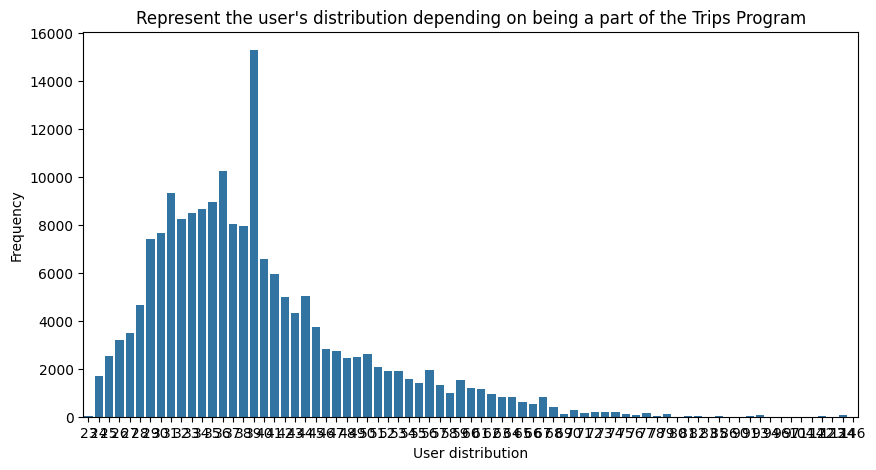

In [314]:
plt.figure(figsize = (10,5), dpi = 100)

plot = sns.countplot(data=df, x='age')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

In [315]:
df.groupby('member_gender').age.plot(kind='kde')

C:\Users\user\AppData\Local\Temp\ipykernel_17608\575257461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('member_gender').age.plot(kind='kde')


member_gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Other     Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

# <a id="3"> 3 ) What is the distribution for users' ages? </a>

> ### Normal distribution

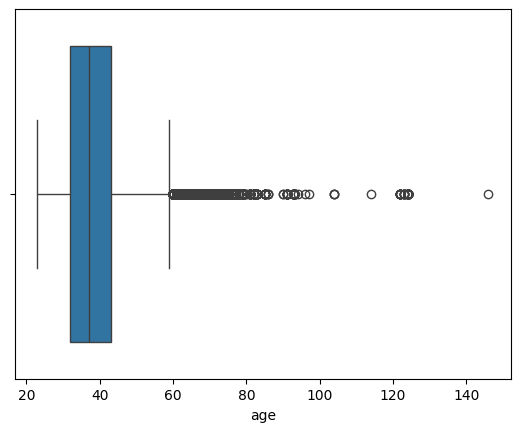

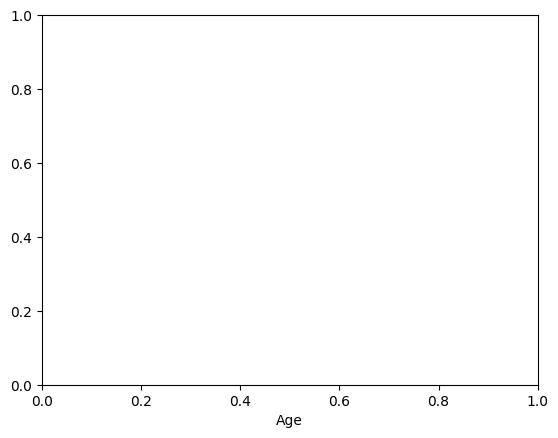

In [316]:
plot = sns.boxplot(x='age', data=df, orient='h')
plt.show()
plt.xlabel("Age")
# Identify outliers using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < Q1 - 1.5*IQR) | (df['age'] > Q3 + 1.5*IQR)]




# <a id="4">  4 ) . Do the users' ages have outlier values?</a>


> ### <mark>Yes </mark>

# <a id="5">  5 ) . What is the distribution for the trip duration in minutes? </a>

In [317]:
## Review the statistic for trip duration in minutes
df['duration_min'].describe()

count   183,416.00
mean         12.10
std          29.91
min           1.02
25%           5.42
50%           8.57
75%          13.27
max       1,424.07
Name: duration_min, dtype: float64

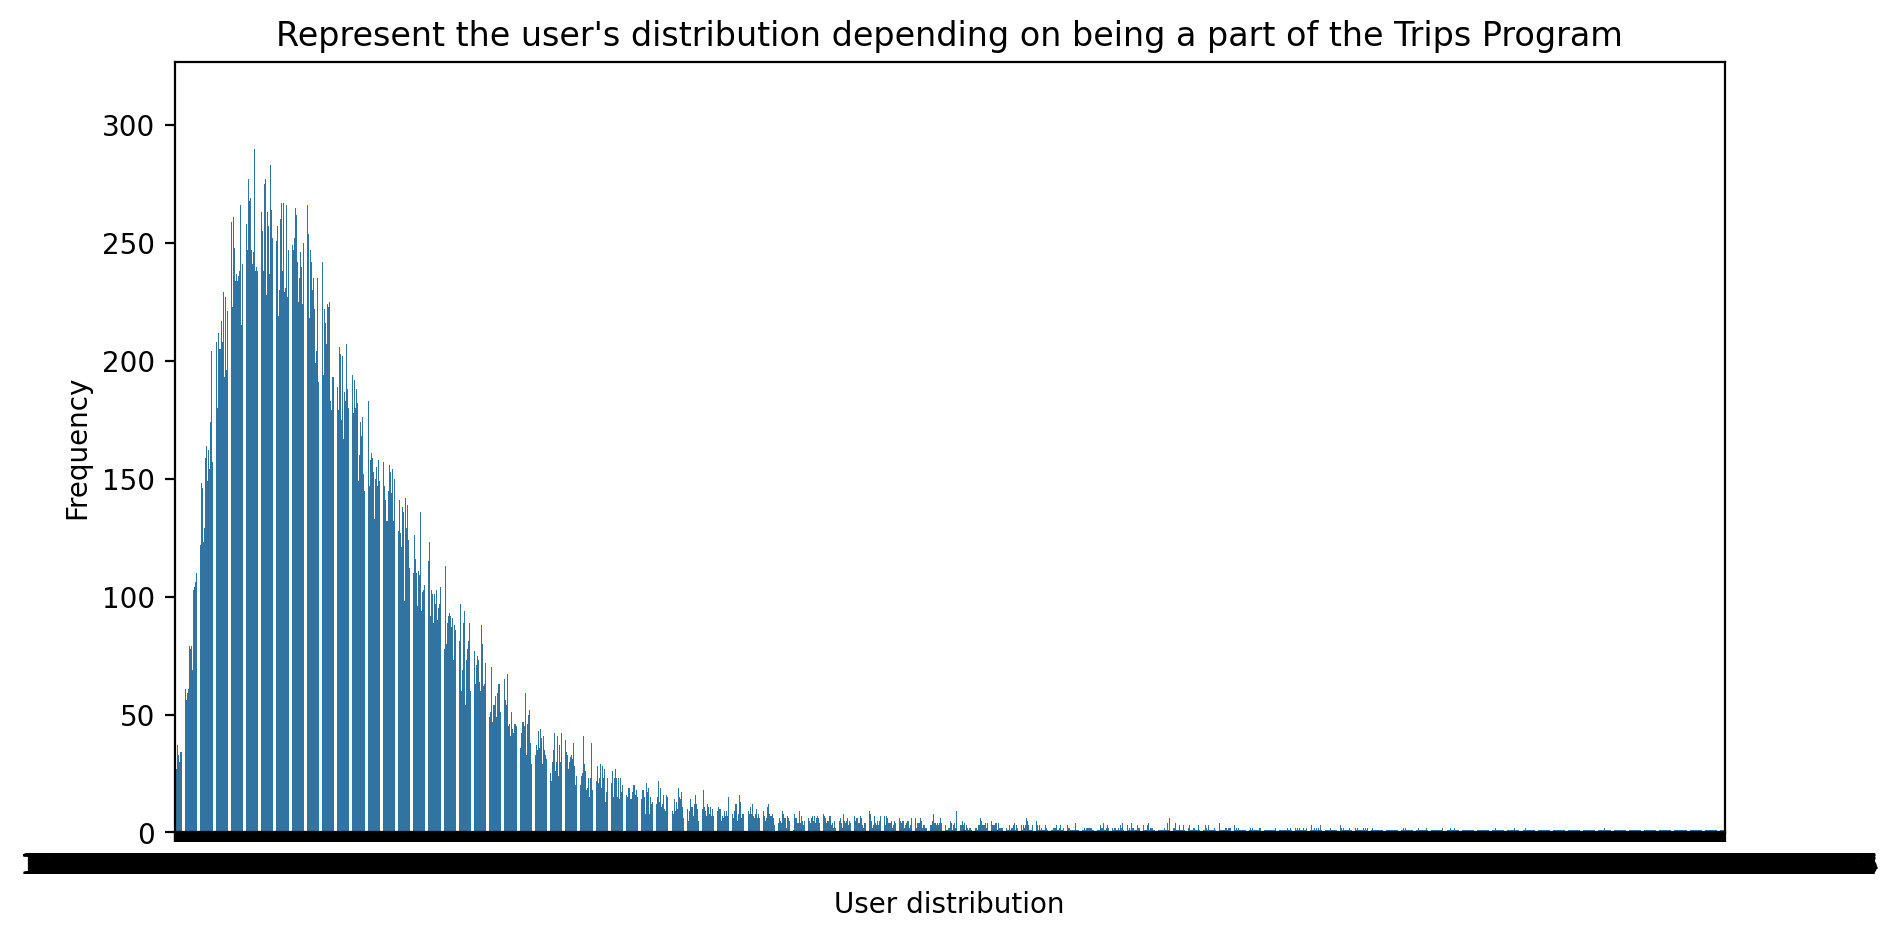

In [318]:
# Make visualization to easy get insight
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(data=df, x='duration_min')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")
plt.show()

> ### This histogram shows a right-skewed user distribution for the "Trips Program." 


# <a id="6"> 6 ) . What is the distribution for member_gender?</a>

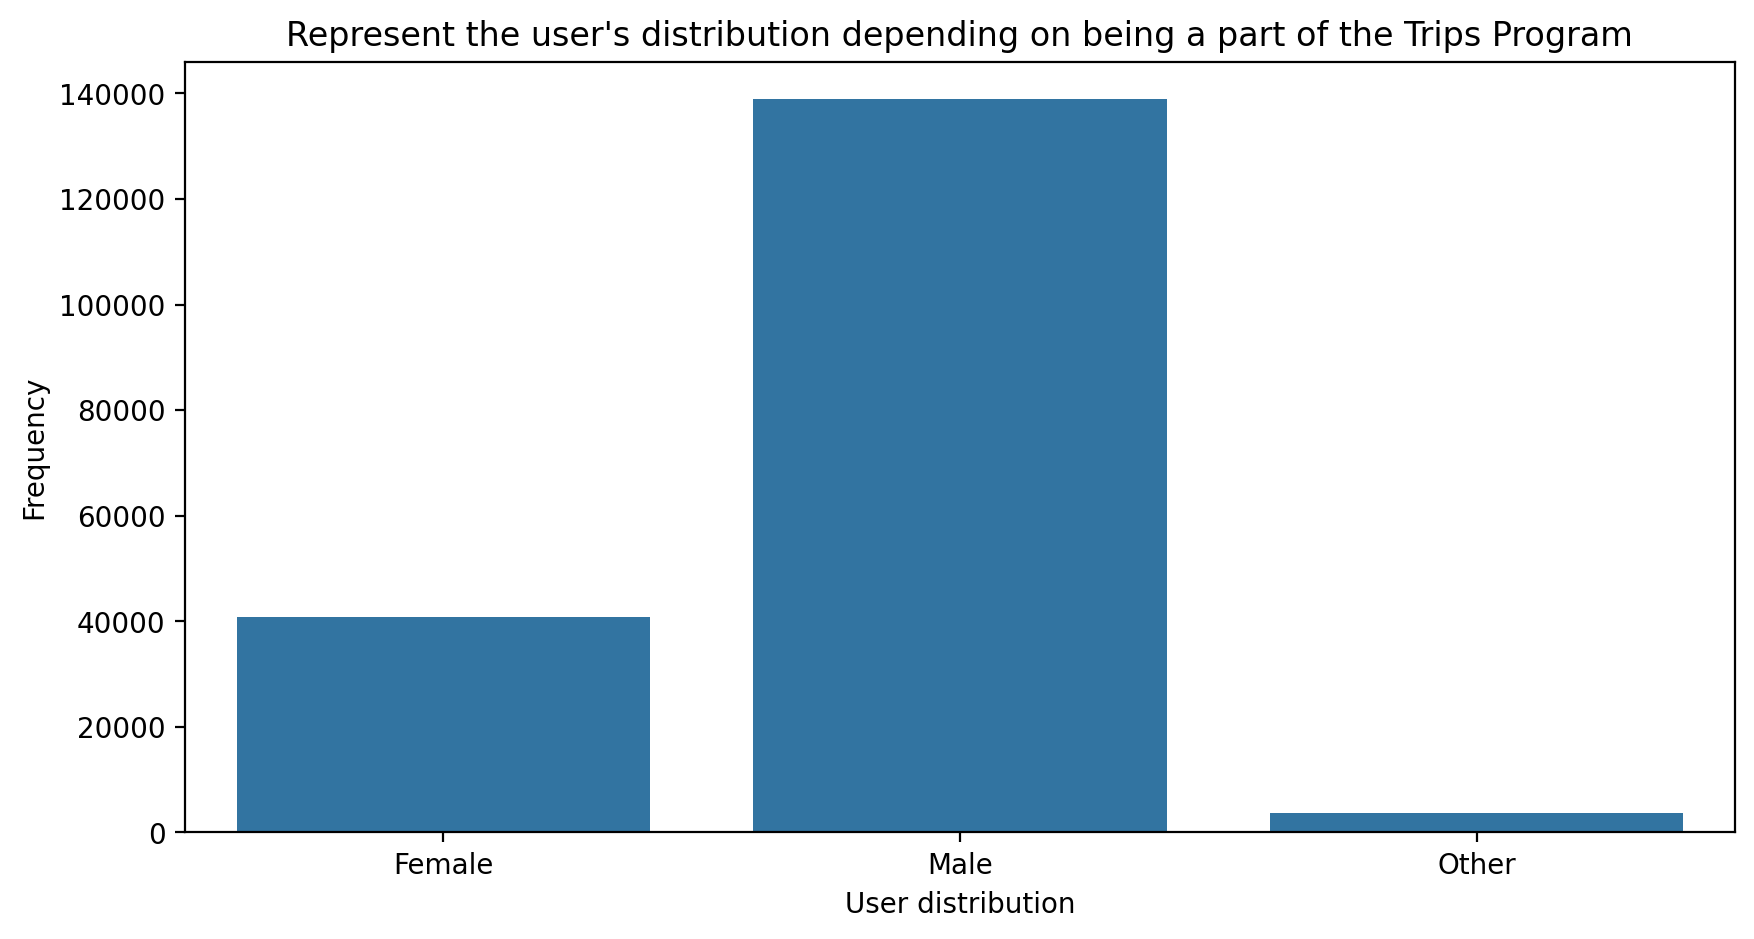

In [319]:
# Make visualization to easy get insight
plt.figure(figsize = (10,5), dpi = 200)
plot = sns.countplot(data=df, x='member_gender')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")

plt.show()

> ### The chart shows that male users are significantly more likely to participate in the Trips Program than female or other gender users

# <a id="7">    7 )  . What is the distribution for the trip duration in Hours?  </a>

AttributeError: 'Axes' object has no attribute 'xlabel'

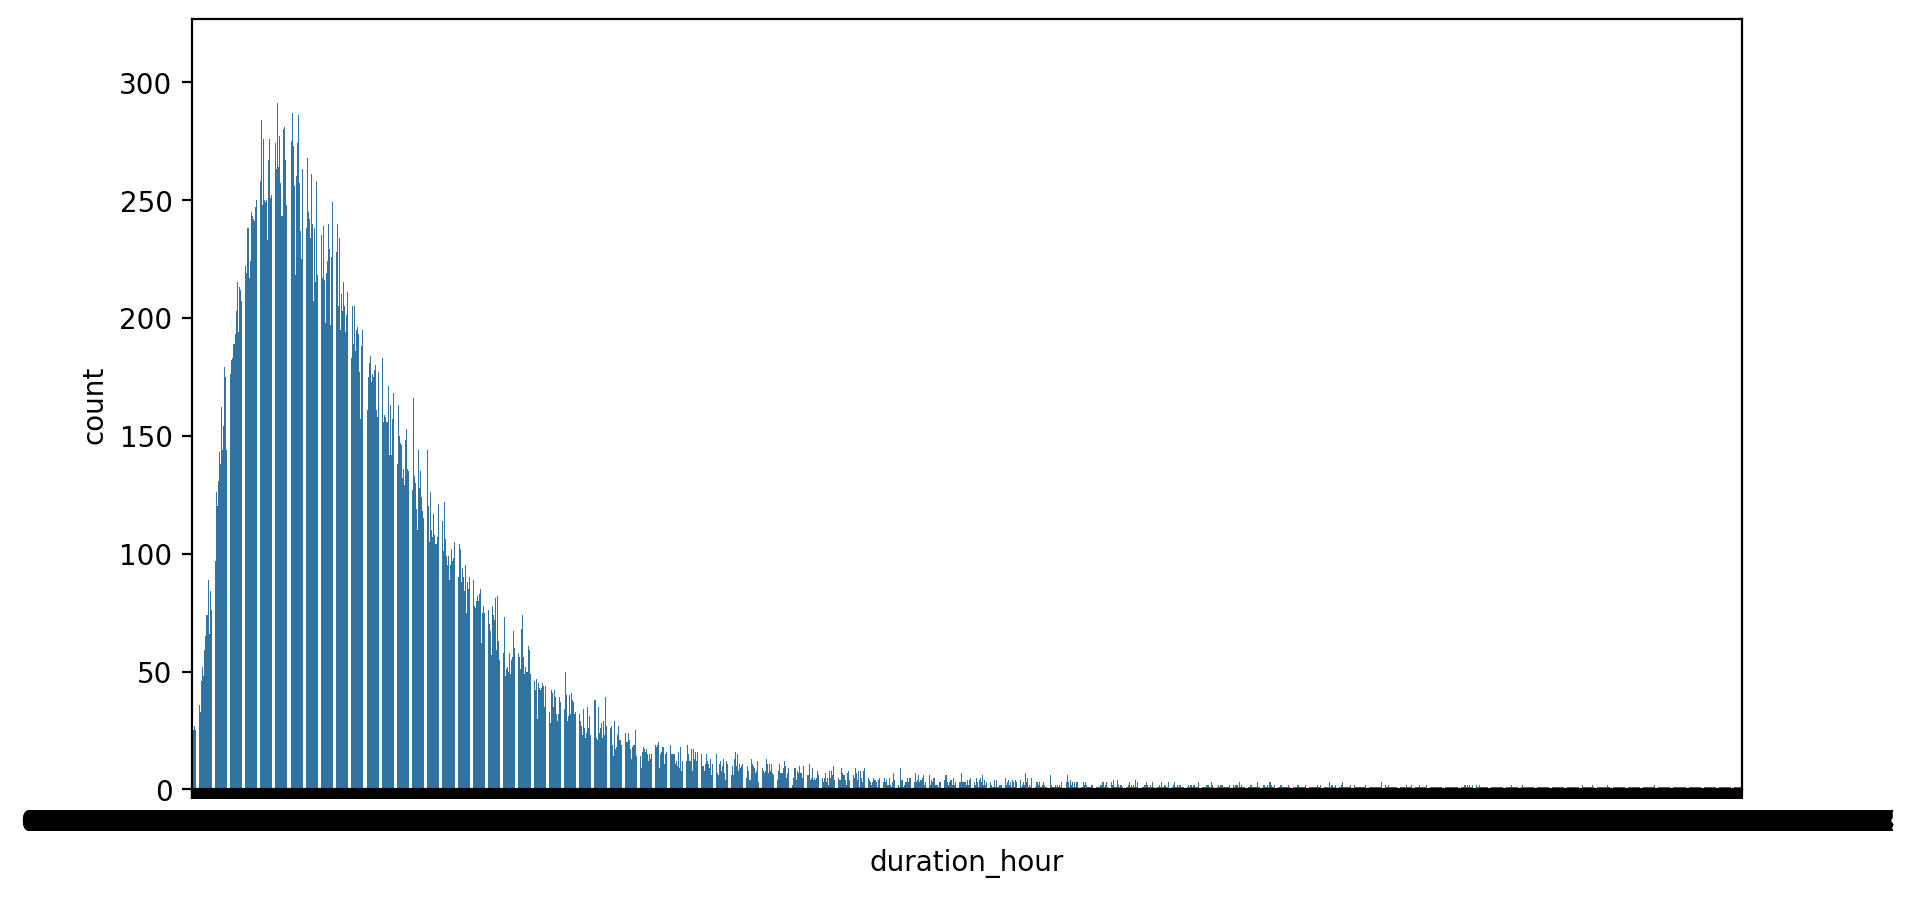

In [320]:
# Make visualization to easy get insight
if 'duration_hour' not in df.columns:
    df['duration_hour'] = df['duration_min'] / 60  
plt.figure(figsize = (10,5), dpi = 200)
plt = sns.countplot(data=df, x='duration_hour')
plt.xlabel('User distribution')
plt.ylabel('Frequency')
plt.title("Represent the user's distribution depending on being a part of the Trips Program")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### The variables distribution:


> The distribution of duration present that most of the trips were less than 30 minutes ( we can notice that from the minutes and the hour charts )


> And the Age distribution is ( left Skewed ) as most users age are  22 - 39


> Most users are subscribers, not Customers and  Males as shown in the charts above.



### Were there any interesting and outliers 


- We got Age outliers for for more than 100 .



- The distribution of duration was strange where the minutes and the hour charts were 30 minutes or less.

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Bivariate Exploration</p>
# <a id="111"> Bivariate Exploration</a>

Now let's investigate relationships between pairs of variables in our data.

# <a id="8"> 8) . What the average duration of trip for the categories of user type?</a>

In [ ]:
# Distribution of Age by user types
plot = sns.barplot(x='user_type', y='duration_hour', data=df) # x = categorical , y = numerical
plt.show()


# Make visualization to easy get insight


# <a id="9">    9 ) . How long is the duration of the trip for each gender in minutes?  </a>

In [174]:
# Make visualization to easy get insight
# ------------------------Duration distribution by member gender
avg_trip_duration_gender = df.groupby('member_gender')['duration_min'].mean()

print(f"Average Trip Duration by Gender (in minutes):\n{avg_trip_duration_gender}")


Average Trip Duration by Gender (in minutes):
member_gender
Female   12.98
Male     11.72
Other    16.61
Name: duration_min, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_16960\562271890.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_trip_duration_gender = df.groupby('member_gender')['duration_min'].mean()


C:\Users\user\AppData\Local\Temp\ipykernel_16960\2890814094.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_trip_duration_gender = df.groupby('member_gender')['duration_min'].mean().reset_index()


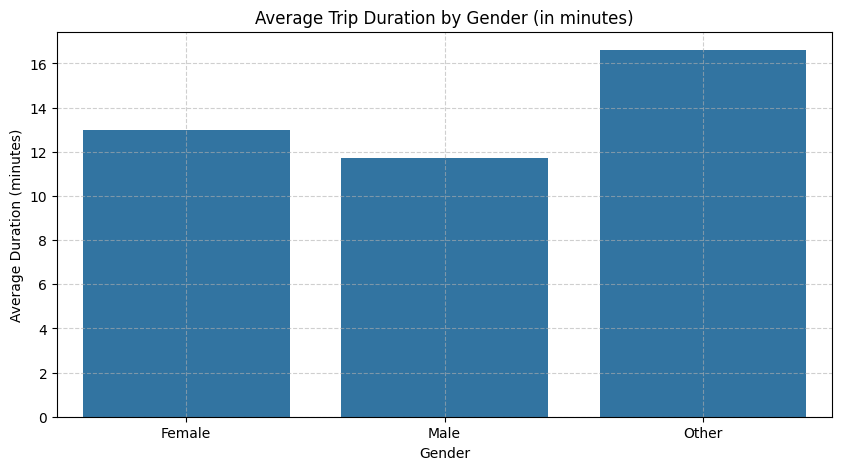

In [179]:

avg_trip_duration_gender = df.groupby('member_gender')['duration_min'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_trip_duration_gender, x='member_gender', y='duration_min')
plt.title("Average Trip Duration by Gender (in minutes)")
plt.xlabel("Gender")
plt.ylabel("Average Duration (minutes)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Make visualization to easy get insight


# <a id="10 "> 10 ) . How long is the duration of the trip for each user_type in minutes?  </a>

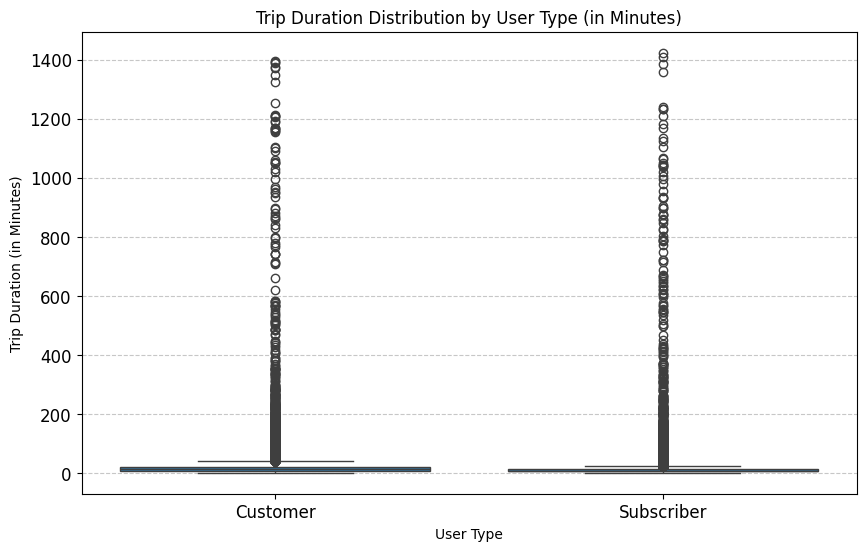

In [180]:

# Make visualization to easy get insight
df = df.dropna(subset=['duration_min', 'user_type'])
df['user_type'] = df['user_type'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_min', data=df)

plt.title("Trip Duration Distribution by User Type (in Minutes)")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (in Minutes)")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# <a id="11">  11 ) . How the user distribution depending on their Age and user_type ? </a>

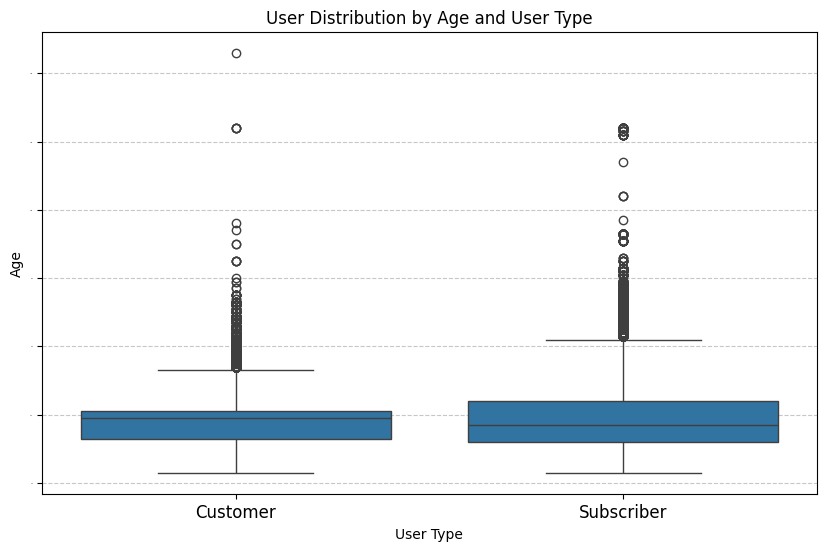

In [181]:

# Make visualization to easy get insight
df = df.dropna(subset=['age', 'user_type'])
df['user_type'] = df['user_type'].astype('category')

plt.figure(figsize=(10, 6))

sns.boxplot(x='user_type', y='age', data=df)

plt.title("User Distribution by Age and User Type")
plt.xlabel("User Type")
plt.ylabel("Age")

plt.xticks(fontsize=12)
plt.yticks(fontsize=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#  <a id="12"> 12 ). How the user distribution depending on their Age and member_gender ?</a>

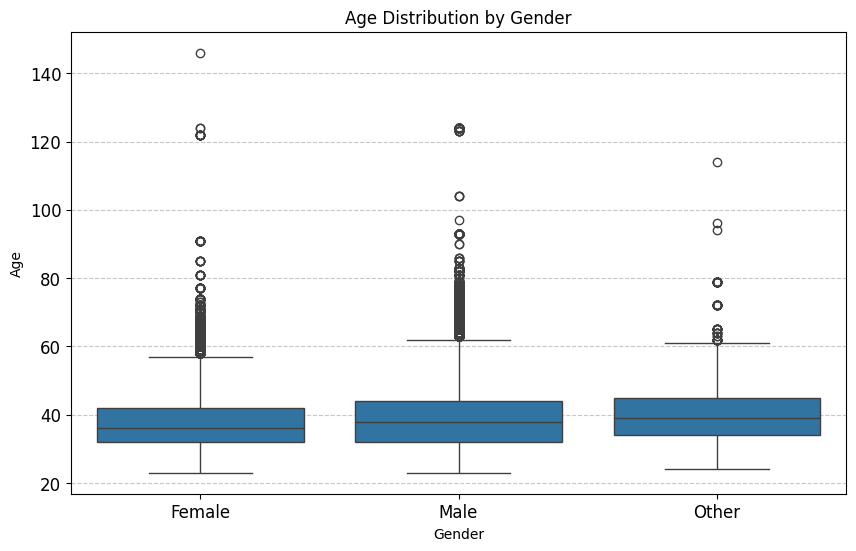

In [ ]:
# Make visualization to easy get insight
df.dropna(subset=['age', 'member_gender'], inplace=True)
df['member_gender'] = df['member_gender'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(x='member_gender', y='age', data=df)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> ...................


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> ....................

# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Multivariate Exploration</p>
# <a id="1111"> Multivariate Exploration </a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

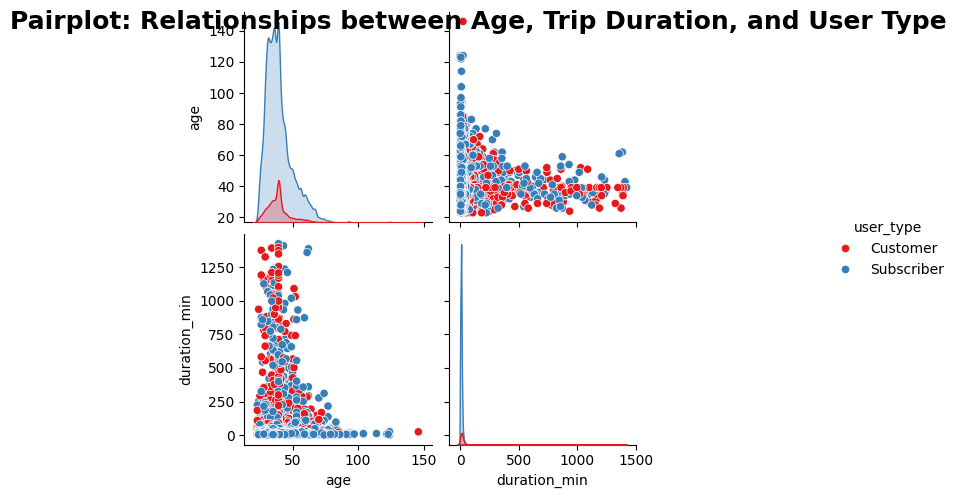

In [183]:
## check your work 
sns.pairplot(df[['age', 'duration_min', 'user_type']], hue='user_type', palette='Set1')
plt.suptitle("Pairplot: Relationships between Age, Trip Duration, and User Type", fontsize=18, fontweight='bold')
plt.show()


# <a id="13">  13 ) . What is the  Correlation between each variable in the dataset?</a>

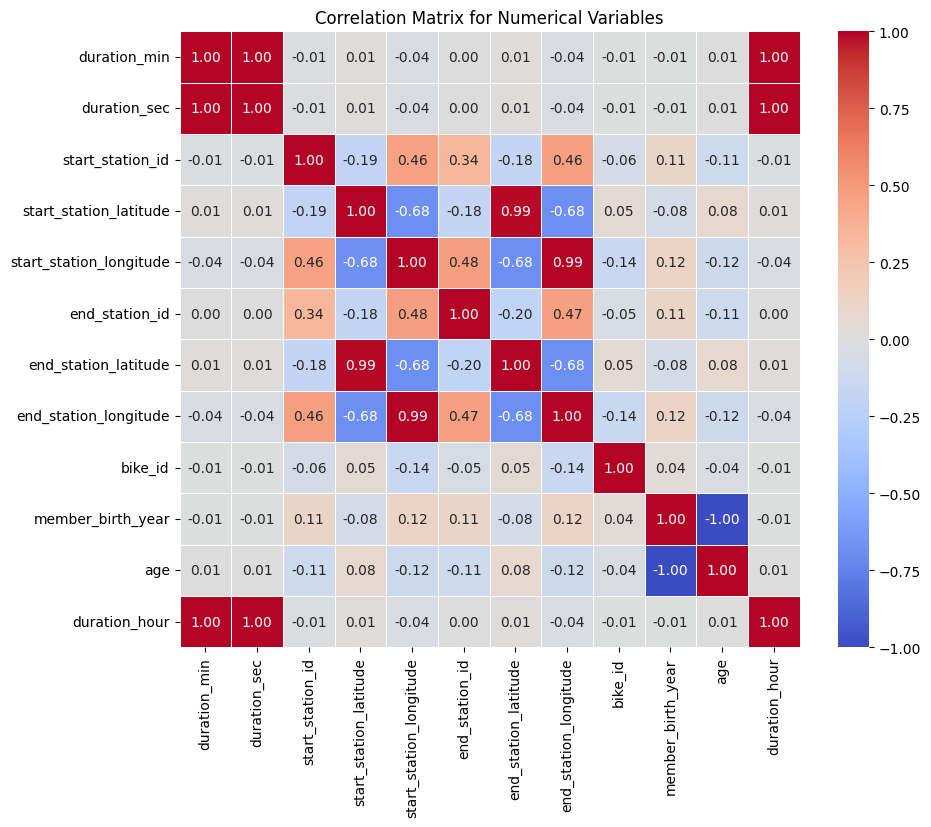

In [185]:
# Make visualization to easy get insight
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

corr = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix for Numerical Variables")

plt.show()


# <a id="14"> 14 )  .  What is the  Correlation between `specific numeric variables` in the dataset?</a>


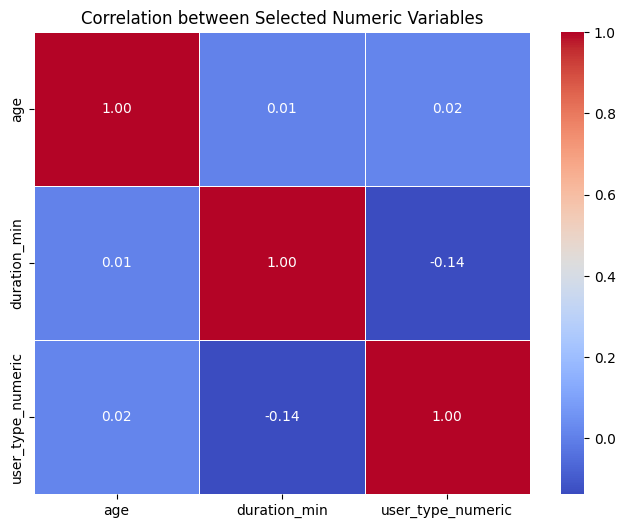

In [186]:
# Make visualization to easy get insight
selected_columns = ['age', 'duration_min', 'user_type']

df['user_type_numeric'] = df['user_type'].map({'Customer': 0, 'Subscriber': 1})

corr_selected = df[['age', 'duration_min', 'user_type_numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Selected Numeric Variables")

plt.show()

# <a id="15">  15 ) What is the  Correlation between data_stat variables in the dataset?</a>


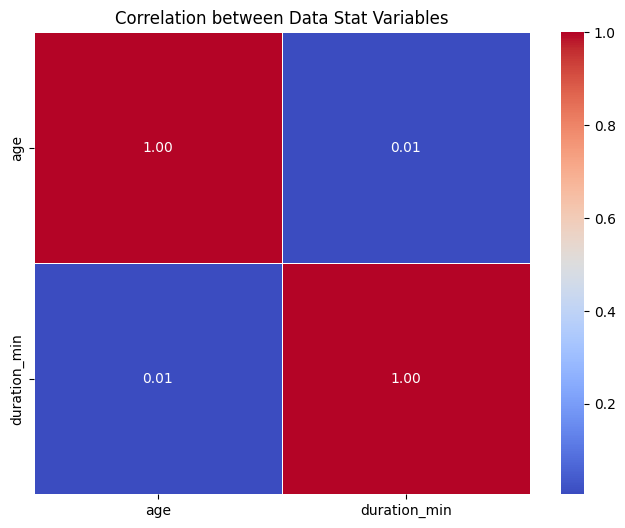

In [187]:

"""""This time I will use heatmap  to explain how Correlation between data_stat variables

in the dataset in more clear and specific percentage"""

# Make visualization to easy get insight

data_stat_columns = ['age', 'duration_min']  
corr_data_stat = df[data_stat_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_stat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Data Stat Variables")

plt.show()


# <p style="border-radius:15px;border-style:solid;border-color:lightblue;border-width:3px;background-color:lightblue;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Conclusions</p>
# <a id="1100"> Conclusions </a>

#example
- Most users were Male.


- 

- 

- 



## limitation 
example
- We got missing data which we fix some of them .

- 
